In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
qc = QuantumCircuit(4, 4)
qc.cx(0, 1)
qc.cx(0, 3)
qc.measure(0, 0)
qc.draw()

┌─┐
q_0: ──■────■──┤M├
     ┌─┴─┐  │  └╥┘
q_1: ┤ X ├──┼───╫─
     └───┘  │   ║ 
q_2: ───────┼───╫─
          ┌─┴─┐ ║ 
q_3: ─────┤ X ├─╫─
          └───┘ ║ 
c: 4/═══════════╩═
                0

In [4]:
def uppg(inp1, inp2, inp3, inp4):
    
    qc = QuantumCircuit(4, 4)
    #conditions
    if(inp1 == '1'):
        qc.x(0)
    if(inp2 == '1'):
        qc.x(1)
    if(inp3 == '1'):
        qc.x(2)
    if(inp4 == '1'):
        qc.x(3)
       
    qc.barrier()
    
    #conditions
    
    qc.cx(3, 1)
    qc.cx(1, 0)
    qc.cx(0, 1)
    qc.ccx(3, 2, 1)
    qc.cx(1, 2)
    qc.cx(3, 2)
    
    #measure
    qc.measure(0, 3)
    qc.measure(1, 2)
    qc.measure(2, 1)
    qc.measure(3, 0)
    qc.draw()

    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

i1 i2 i3 i4
0  0  0  0 = 0000
0  0  0  1 = 1011
0  0  1  0 = 0010
0  0  1  1 = 1111
0  1  0  0 = 1000
0  1  0  1 = 0011
0  1  1  0 = 1010
0  1  1  1 = 0111
1  0  0  0 = 1110
1  0  0  1 = 0101
1  0  1  0 = 1100
1  0  1  1 = 0001
1  1  0  0 = 0110
1  1  0  1 = 1101
1  1  1  0 = 0100
1  1  1  1 = 1001


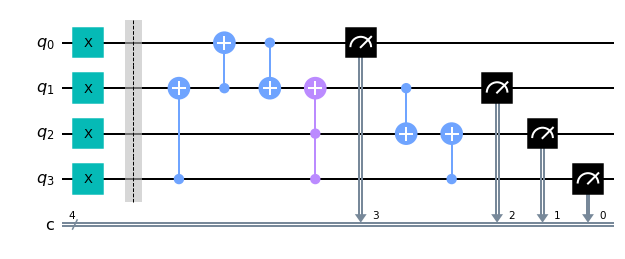

In [7]:
print('{} {} {} {}'. format('i1', 'i2', 'i3', 'i4'))
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        for inp3 in ['0', '1']:
            for inp4 in ['0', '1']:
                qc_new, output = uppg(inp1, inp2, inp3, inp4)
                print('{}  {}  {}  {}'.format(inp1, inp2, inp3, inp4), '=', output)
            
display(qc_new.draw('mpl'))

In [ ]:
uppg_gate = uppg.to_gate()
new_gate = QuantumCircuit(5)
new_gate.append(uppg_gate, [1, 2, 3, 4])
new_gate.decompose().draw()

PROBABILITY MEASUREMENT

In [2]:
def uppg1(inp1, inp2, inp3, inp4):
    
    qc = QuantumCircuit(4, 4)
    #conditions
    if(inp1 == '1'):
        qc.x(0)
    if(inp2 == '1'):
        qc.x(1)
    if(inp3 == '1'):
        qc.x(2)
    if(inp4 == '1'):
        qc.x(3)
       
    qc.barrier()
    
    #conditions
    
    qc.cx(3, 1)
    qc.cx(1, 0)
    qc.cx(0, 1)
    qc.ccx(3, 2, 1)
    qc.cx(1, 2)
    qc.cx(3, 2)
    
    #measure
    qc.measure(0, 3)
    qc.measure(1, 2)
    qc.measure(2, 1)
    qc.measure(3, 0)
    qc.draw()

    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1024)
    output = job.result().get_counts()
    
    return qc, output

0 0 0 0 = {'0000': 1024}
0 0 0 1 = {'1011': 1024}
0 0 1 0 = {'0010': 1024}
0 0 1 1 = {'1111': 1024}
0 1 0 0 = {'1000': 1024}
0 1 0 1 = {'0011': 1024}
0 1 1 0 = {'1010': 1024}
0 1 1 1 = {'0111': 1024}
1 0 0 0 = {'1110': 1024}
1 0 0 1 = {'0101': 1024}
1 0 1 0 = {'1100': 1024}
1 0 1 1 = {'0001': 1024}
1 1 0 0 = {'0110': 1024}
1 1 0 1 = {'1101': 1024}
1 1 1 0 = {'0100': 1024}
1 1 1 1 = {'1001': 1024}


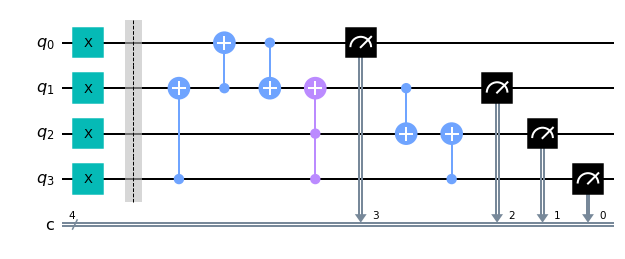

In [3]:
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        for inp3 in ['0', '1']:
            for inp4 in ['0', '1']:
                qc_new, output = uppg1(inp1, inp2, inp3, inp4)
                print('{} {} {} {}'.format(inp1, inp2, inp3, inp4), '=', output)
            
display(qc_new.draw('mpl'))

A B C D   PQRS
0 0 0 0 = 0000
0 0 0 1 = 1011
0 0 1 0 = 0010
0 0 1 1 = 1111
0 1 0 0 = 1000
0 1 0 1 = 0011
0 1 1 0 = 1010
0 1 1 1 = 0111
1 0 0 0 = 1110
1 0 0 1 = 0101
1 0 1 0 = 1100
1 0 1 1 = 0001
1 1 0 0 = 0110
1 1 0 1 = 1101
1 1 1 0 = 0100
1 1 1 1 = 1001
____________________________
To draw the quantum circuit for the uppg gate in block circuit


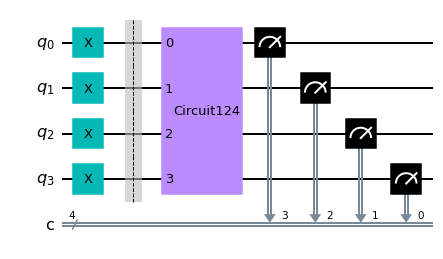

____________________________
To draw the quantum circuit for the uppg gate in gate form


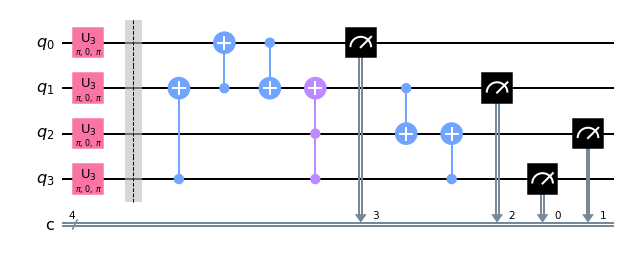

_______________________________
The histogram plot for the UPPG gate


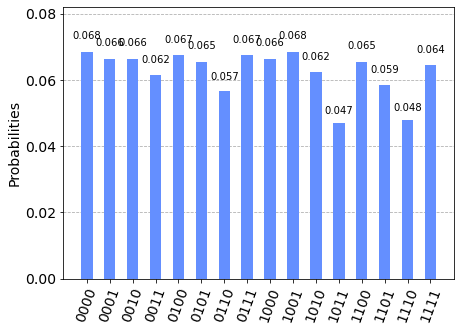

In [6]:
uppg_circuit = QuantumCircuit(4)
uppg_circuit.cx(3, 1)
uppg_circuit.cx(1, 0)
uppg_circuit.cx(0, 1)
uppg_circuit.ccx(3, 2, 1)
uppg_circuit.cx(1, 2)
uppg_circuit.cx(3, 2)
uppg_gate = uppg_circuit.to_gate()

#defining a function to check the output for all the combinations
def uppg_new(inp1, inp2, inp3, inp4):
    
    qc = QuantumCircuit(4, 4)
    #conditions
    if(inp1 == '1'):
        qc.x(0)
    if(inp2 == '1'):
        qc.x(1)
    if(inp3 == '1'):
        qc.x(2)
    if(inp4 == '1'):
        qc.x(3)
       
    qc.barrier()
    #appending the uppg gate
    qc.append(uppg_gate, [0, 1, 2, 3])
   
    #measurements for all inputs
    qc.measure(0, 3)
    qc.measure(1, 2)
    qc.measure(2, 1)
    qc.measure(3, 0)
    qc.draw()

     #using Aer backend and qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    return qc, output



#looping over to get all possible combinations
print('{} {} {} {}'.format('A', 'B', 'C', 'D'), '  PQRS' )
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        for inp3 in ['0', '1']:
            for inp4 in ['0', '1']:
                qc, output = uppg_new(inp1, inp2, inp3, inp4)
                print('{} {} {} {}'.format(inp1, inp2, inp3, inp4), '=', output)
            

#to draw the quantum circuit for the UPPG gate
print('____________________________')
print('To draw the quantum circuit for the uppg gate in block circuit')
display(qc.draw('mpl'))
print('____________________________')
print('To draw the quantum circuit for the uppg gate in gate form')
display(qc.decompose().draw('mpl'))

#plotting the histogram
qc_hist = QuantumCircuit(4, 4)
qc_hist.append(uppg_gate, [0, 1, 2, 3])
for i in range(4):
    qc_hist.h(i)
qc_hist.measure(0, 3)
qc_hist.measure(1, 2)
qc_hist.measure(2, 1)
qc_hist.measure(3, 0)
job = execute(qc_hist, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
print('_______________________________')
print('The histogram plot for the UPPG gate')
plot_histogram(count)
